#  Занятие 2. Чтение, запись и управление файлами

## Работа с простейшими файлами

Согласно определению файл - именованная область постоянной памяти в компьютере, которой управляет операционная система. 

Чтобы открыть файл, нужно воспользоваться встроенной функцией `open(<путь до файла>, <режим работы с файлом (mode)>)`

| mode | Описание |
| --- | --- |
|`'r'` | чтение (read-only, это значение выставлено по умолчанию)|
|`'x'`| создает файл для записи; если файл уже существует, то выдаст ошибку|
|`'w'`| создает файл для записи; если файл уже существует, данные будут перезаписаны|
|`'a'`| открывает файл для дозаписи в конец файла; если требуемого файла нет, то сначала создаст его|

* Добавление символа `b` в строку режима означает работу с двоичными данными
* Добавление символа `+` означает, что файл открывается и для чтения, и для записи

Рассмотрим пример работы с файлом.
Создадим для записи файл `first_file.txt` в директории `./files/` и запишем в него две строки, после чего закроем файл.

In [1]:
f = open('files/first_file.txt', 'w')  # Открыли файл для записи (файл появится в папке  files)

In [2]:
f.write('hello text file\n')  # Записываем строку в файл с помощью функции write
f.write('nice to meet you\n')
f.close()  # Закрываем файл с помощью функции close

Попробуем считать данные из нашего файла с помощью функции `readline`, считывающей одну строку из файла при каждом обращении. 

In [3]:
f = open('files/first_file.txt')

In [4]:
f

<_io.TextIOWrapper name='files/first_file.txt' mode='r' encoding='utf-8'>

In [5]:
line1 = f.readline()  # читаем строку

In [6]:
line1

'hello text file\n'

In [7]:
line2 = f.readline() 
f.close()

In [8]:
line1, line2

('hello text file\n', 'nice to meet you\n')

Строк в файле обычно бывает много, поэтому обернем считывание из файла в цикл

In [9]:
f = open('files/first_file.txt')
lines = []  # массив для хранения строк
while True:
    line = f.readline()
    if line == '':  # проверяем, есть ли еще строки в файле
        break
    lines.append(line)
f.close()

In [10]:
lines

['hello text file\n', 'nice to meet you\n']

Закрывать за собой файлы - это пример хорошего тона в программировании, однако в Python это действие не является обязательным. Дело в автоматическом сборщике мусора, который закроет файл после окончания выполнения программы.

Помимо этого существует альтернитивный вариант автоматического закрытия файла - использование так называемого *контекстного менеджера*:

### Контексный менеждер для работы с файлами

In [11]:
lines = []
with open('files/first_file.txt') as f:
    while True:
        line = f.readline()
        if line == '':  
            break
        lines.append(line)
print(lines)

['hello text file\n', 'nice to meet you\n']


Открытие файла при помощи конструкции `with` ... `as` позволяет автоматически закрыть файл после выполнения блока внутри конструкции. Убедимся, что файл закрыт:

In [12]:
f.write('df')

ValueError: I/O operation on closed file.

Есть возможность прочитать файл целиком за один раз. Инструкция `file.read()` вернет строку со всем содержимым файла. Однако делать так стоит лишь когда вы уверены, что размер файла не превышает размера оперативной памяти, оставшейся в распоряжении компьютера.

In [13]:
lines = []
with open('files/first_file.txt') as f:
    whole_file = f.read()
    for line in whole_file.split('\n'):
        lines.append(line)
        

In [14]:
whole_file

'hello text file\nnice to meet you\n'

In [15]:
lines

['hello text file', 'nice to meet you', '']

посмотреть о всех возможных методах для файлов можно посмотреть [тут](https://docs.python.org/2.4/lib/bltin-file-objects.html)

## Модули 

Зачастую при разработке какого-нибудь проекта написанный программный код разрастается, и работать с ним становится некомфортно (даже после разбиения его на отдельные функции или другие структуры). В таком случае полезно разделять программный код на отдельные логические части и "прятать" их в модули. Например, если программа использует большое число различных функций, удобно все эти функции поместить в один модуль и подгрузить его.

Любой файл с текстом на языке Python и расширением `.py`может быть использован в качестве модуля. Например, `fft.py`.

Рассмотрим в качестве примера модули в папке *modules_examples*. 

Загрузить файл с этим кодом в качестве модуля можно с помощью инструкции 

`import modules_examples.test_module1`

Файл `test_module1.py`

```python

# test_module1
print(f"Hello, i'm module")

var1 = 1000

def some_cool_function():
    print('I do nothing')
    
def func(a: str, b: str):
    return f"{a.capitalize()} {b.upper()}"
```

In [16]:
import modules_examples.test_module1 as tm1

Hello, i'm module modules_examples.test_module1


Команда `import` выполняет все инструкции в загруженном файле, поэтому появляется вывод функции `print`. Инструкция `import` может появляться в любом месте программы, однако программный код любого модуля загружается и выполняется только один раз, независимо от количества инструкций `import`, загружающих его. Все последующие инструкции `import` будут просто связывать имя модуля с объектом модуля, созданным первой встретившейся инструкцией `import`.

In [17]:
import modules_examples.test_module1 as tm1

In [18]:
tm1.var1

1000

In [19]:
tm1.some_cool_function()

I do nothing


В одной из первых тем курса мы говорили, что посмотреть доступные методы некоторого объекта можно с помощью функций `help` и `dir`. Давайте воспользуемся функцией `help` и посмотрим информацию об импортируемом модуле

In [20]:
help(tm1)

Help on module modules_examples.test_module1 in modules_examples:

NAME
    modules_examples.test_module1

FUNCTIONS
    func(a: str, b: str)

    some_cool_function()

DATA
    var1 = 1000

FILE
    c:\vs_projects\automation of work with text data and excel tables using python\2. read, write and manage files for different os\modules_examples\test_module1.py




Мы видим основную информацию о модуле: его название, список достпуных методов, также имеется целочисленная переменная `var1` и полный путь до модуля. Соответственно, после импорта нам доступны все методы и переменные в модуле

In [21]:
tm1.var1

1000

In [22]:
tm1.some_cool_function()

I do nothing


In [23]:
tm1.func('type', 'something')

'Type SOMETHING'

#### Импортирование отдельных имен из модулей
Иногда из всего модуля нам необходимо всего несколько функций и нам не хочется импортировать его целиком. Тогда можно воспользоваться инструкцией `from <module> import <function1>, <function2>`.

Файл `test_module2.py`
```python 
#test_module2

def some_cool_function():
    print('I do nothing')

def func(a: str, b: str):
    return f"{a.capitalize()} {b.upper()}"

def prod(a=1, *args):
    for i in args:
        a *= i
    return a
```

In [24]:
from modules_examples.test_module2 import *

In [25]:
prod(2, 3, 4)

24

Для того чтобы подгрузить все функции в модуле через инструкцию `from` можно воспользоваться выражением `from <module> import *`. 

Такая запись избавит вас от необходимости писать название модуля перед нужной функцией. Однако делать так не рекомендуется, так как при таком вызове в наше пространство имен выгружаются все имена функций, переменных из модуля, и в таком случае при совпадении имен старое значение будет перезаписано. 

Например, пусть у нас есть переменная  `sign`, а в модуле `test_module3.py` содержится функция с таким же именем.

In [26]:
sign = "+"

Файл `test_module3.py`
```python 
#test_module3

def sign(a, b):
    return 1 if a > b else 0
```

Если теперь из модуля `test_module3.py` подгрузить все функции, то переменная `sign` перезапишется и станет функцией.

In [27]:
sign

'+'

In [28]:
from modules_examples.test_module3 import *  

In [29]:
sign

<function modules_examples.test_module3.sign(a, b)>

In [30]:
%%writefile mdl.py
print('n')
def f():
    return 'a'

Writing mdl.py


In [31]:
import mdl
mdl.f()

n


'a'

In [32]:
привет = 10
print(привет +10)

20


### Задача 1
---
Напишите модуль `ticket` в котором есть функция `is_ticket_happy`, которая ожидает на вход строку и проверяет является ли введенный номер [счастливым](https://ru.wikipedia.org/wiki/%D0%A1%D1%87%D0%B0%D1%81%D1%82%D0%BB%D0%B8%D0%B2%D1%8B%D0%B9_%D0%B1%D0%B8%D0%BB%D0%B5%D1%82) - cчастливым считается билет, в шестизначном номере которого сумма первых трёх цифр совпадает с суммой трёх последних. 

Функция возвращает булевое значение.

In [33]:
%%writefile happy.py
def is_ticket_happy(s: str) -> bool:
    return int(s[0]) + int(s[1]) + int(s[2]) == int(s[-3]) + int(s[-2]) + int(s[-1])

Writing happy.py


In [34]:
is_ticket_happy('101290')

NameError: name 'is_ticket_happy' is not defined

In [35]:
import happy
happy.is_ticket_happy('101201')

False

In [36]:
from happy import is_ticket_happy
is_ticket_happy('101201')

False

In [37]:
is_ticket_happy('111003')

True

## Библиотеки

Теперь мы перейдём к изучению библиотек. По факту библиотекой называется набор тех самых модулей для решения конкретных задач. Часто в Python слово "модуль" и "библотека" вообще используются как синонимы. Главный критерий по которому мы будем разделять библиотеку и модуль будет то, что модуль написан лично Вами, а библиотека сделана другими профессиональными разработчиками. 

В Anacond-e есть встроенный набор некоторых библиотек, в качестве примера рассмотрим библиотеку `random`. 

Очень часто при решении задач, например, при статистическом моделировании результатов различных экспериментов, возникает необходимость использования случайных чисел.

Для работы с ними в языке `Python` реализован целый набор функций, которые собраны в модуле `random`.

Для подключения модуля к программе используется инструкция:

~~~python
import random
~~~

Ниже приведены некоторые из функций модуля, которые позволят использовать команды для генерации псевдослучайных чисел.

|Функции |Описание|
|---|:-|
|`random.random()`|возвращает случайное вещественное число от 0.0 до 1.0|
|`random.seed([a=<параметр>][, version=2])`|настраивает генератор случайных чисел на новую последовательность|
|`random.uniform(<начало>, <конец>)`|возвращает случайное вещественное число в равновероятном диапазоне от \<начала\> до \<конца\>|
|`random.randint(<начало>, <конец>)`|случайное целое число в диапазоне от \<начала\> до \<конца\>|
|`random.randrange(<начало>, <конец>, <шаг>)`|выбирает случайный элемент из числовой последовательности|
|`random.choice(<последовательность>)`|выбирает случайный элемент из некоторой непустой последовательности|

*Псевдо*случайными числа называются потому, что для их создания применяются математические формулы, так что, зная вид генерирующей формулы и стартовые числа ("затравки" или "зерна" – seed), можно воспроизвести всю последовательность. Кроме того, цепочки псевдослучайных чисел являются замкнутыми: через $N$-ое количество значений последовательность начнет повторяться (именно последовательность, а не ее отдельные элементы). Величина $N$ считается показателем качества генератора случайных чисел: чем она выше, тем более надежную "случайность" вы получите в своей программе. Современные хорошие генераторы обладают длинами неповторяющихся последовательностей около $10^{50}$ значений!

In [38]:
import random

In [39]:
a = random.random()
print(a)

0.4711175603874761


In [40]:
random.seed(2)
a = random.random()
print(a)
print(random.random())

0.9560342718892494
0.9478274870593494


In [41]:
a = random.uniform(-1, 10)
print(a)

-0.37793495500510443


In [42]:
a = random.randint(-1, 1)
print(a)

-1


In [44]:
a = random.choice(['A', 'B', 'C'])
print(a)

A


### Задача 2
---

Напишите функцию, которая моделирует взятие случайной карты из колоды.

Примерный формат вывода: 6♥ 2♦ Q♣ A♠ 

In [45]:
import random
values = [str(i) for i in range(2, 11)] + ['J', 'Q', 'K', 'A']
suits = ['♥', '♦', '♣', '♠']

deck = []
for value in values:
    for s in suits:
        deck.append(value+s)

In [46]:
random.seed(4)
for i in range(10):
    print(random.choice(deck))

5♠
6♠
3♣
K♣
8♦
9♣
4♦
3♦
3♥
2♦


### Библиотеки для работы с файлами и окружением

### Модуль `os`

Библиотека `os` в Python предоставляет множество функций для взаимодействия с операционной системой. Далее, посмотрим на основные функции данной библиотеки

In [47]:
import os

Вывод рабочей директории

In [48]:
os.getcwd()

'c:\\vs_projects\\Automation of work with text data and Excel tables using Python\\2. Read, write and manage files for different OS'

Библиотека позволяет создавать и удалять директории

In [49]:
new_folder = 'os_example'
os.mkdir(new_folder)

In [50]:
os.rmdir('os_example')

Модуль позволяет получить список всех файлов и папок, содержащихся в заданной директории

In [51]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 '2. Read, write and manage files for different OS.ipynb',
 'files',
 'happy.py',
 'mdl.py',
 'modules_examples',
 'pdf-files',
 'photo',
 '__pycache__']

In [52]:
path = './files'
files = os.listdir(path)

In [53]:
files

['first_file.txt', 'massiv.txt']

Чтобы не прописывать пути до файлов в ручную можно использовать метод `join`

In [54]:
os.path.join(path, files[0])

'./files\\first_file.txt'

In [55]:
path = os.path.join('test_dir', 'level_1', 'level_2', 'level_3')
path

'test_dir\\level_1\\level_2\\level_3'

Если нужно создать поддиректории тоже

In [56]:
os.makedirs(path)

In [57]:
os.rmdir('./test_dir')

OSError: [WinError 145] Папка не пуста: './test_dir'

Также есть возможность получить полный путь до файла

In [58]:
files[0]

'first_file.txt'

In [59]:
path_to_file = os.path.abspath(files[0])
path_to_file

'c:\\vs_projects\\Automation of work with text data and Excel tables using Python\\2. Read, write and manage files for different OS\\first_file.txt'

In [60]:
os.path.exists(path_to_file)

False

In [61]:
path = os.path.join('files', files[0])
path_to_file = os.path.abspath(path)

In [62]:
path_to_file

'c:\\vs_projects\\Automation of work with text data and Excel tables using Python\\2. Read, write and manage files for different OS\\files\\first_file.txt'

In [63]:
os.path.exists(path_to_file)

True

Проверка является ли указанный путь файлом или директорией

In [64]:
os.path.isfile(path_to_file)

True

In [65]:
os.path.isdir(path_to_file)

False

#### Обход дерева катологов
Предположим, вы хотите переименовать все файлы, находящиеся в некоторой папке, а также во всех ее подпапках. Следовательно, вам необходимо выполнить обход всего  дерева каталогов. 


In [66]:
items = [item for item in os.walk('./')]

Функция возвращает по три значения на каждой итерации цикла:
* строку с именем папки 
* список строк из имен папок, которые содержатся в текущей папке
* список строк из имен файлов текущей папки

In [67]:
items[4]

('./modules_examples\\__pycache__',
 [],
 ['test_module1.cpython-312.pyc',
  'test_module2.cpython-312.pyc',
  'test_module3.cpython-312.pyc'])

In [68]:
os.system('touch test.txt')

1

### Модуль `shutil`
Содержит функции, позволяющие копировать, перемещать, переименовывать и удалять файлы. 

In [69]:
import shutil

Работать с библиотекой мы начнем на примере. Рассмотрим содержимое папки `photo`

In [70]:
path = './photo'
files = os.listdir(path)
print(files)

['.DS_Store', 'cat1.avif', 'cat2.jpg', 'cat3.jpg', 'dog1.avif', 'dog2.jpeg', 'dog3.avif', 'dog4.avif']


Рассортируем наши фотографии по отдельным папкам внутри акталога `photo`

In [71]:
path_cats = os.path.join(path, 'cats-photos')
path_dogs = os.path.join(path, 'dogs-photos')

In [72]:
def create_dir(path: str) -> None:
    if not os.path.exists(path):
        os.mkdir(path)

In [73]:
create_dir(path_cats)
create_dir(path_dogs)

In [74]:
for item in os.listdir(path):
    full_path = os.path.abspath(os.path.join(path, item))
    if os.path.isfile(full_path):
        move_to = path_cats if 'cat' in item else path_dogs
        shutil.move(full_path, move_to)

#### Удаление  директории с файлами

In [75]:
shutil.rmtree('./test_dir')

 ### Пример архивирования файлов

In [76]:
import zipfile

In [77]:
path = 'photo'
with zipfile.ZipFile('photo.zip', 'w') as zfile:
    for folder_name, sub_folders, filenames in os.walk(path):
        zfile.write(folder_name)
        for filename in filenames:
            zfile.write(os.path.join(folder_name, filename))


### Работа с PDF документами
PDF документы представляют собой бинарные файлы, который могут содержать массу дополнительной информации, и поэтому работать с ними несколько сложнее, чем с текстовыми файлами.

В данном разделе мы рассмотрим примеры работы с pdf файлами для извлечения текстовой информации из них


In [78]:
!pip install pymupdf

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 8.4 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/16.2 MB 11.2 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/16.2 MB 16.8 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 16.0 MB/s eta 0:00:00


In [79]:
import pymupdf

In [80]:
pdf_file = pymupdf.open('pdf-files/paper.pdf')

In [81]:
help(pdf_file)

Help on Document in module pymupdf object:

class Document(builtins.object)
 |  Document(filename=None, stream=None, filetype=None, rect=None, width=0, height=0, fontsize=11)
 |
 |  Methods defined here:
 |
 |  __contains__(self, loc) -> bool
 |
 |  __delitem__(self, i) -> None
 |
 |  __enter__(self)
 |
 |  __exit__(self, *args)
 |
 |  __getitem__(self, i=0)
 |
 |  __init__(self, filename=None, stream=None, filetype=None, rect=None, width=0, height=0, fontsize=11)
 |      Creates a document. Use 'open' as a synonym.
 |
 |      Notes:
 |          Basic usages:
 |          open() - new PDF document
 |          open(filename) - string or pathlib.Path, must have supported
 |                  file extension.
 |          open(type, buffer) - type: valid extension, buffer: bytes object.
 |          open(stream=buffer, filetype=type) - keyword version of previous.
 |          open(filename, fileype=type) - filename with unrecognized extension.
 |          rect, width, height, fontsize: layout 

In [82]:
pdf_file.page_count

10

In [83]:
pdf_file.metadata

{'format': 'PDF 1.3',
 'title': 'Laser-induced ultrafast insulator-metal transition in ${\\rm Ba}{\\rm Bi}{\\rm O}_{3}$',
 'author': 'Alexander E. Lukyanov',
 'subject': 'Phys. Rev. Res. 2, 043207 (2020). doi:10.1103/PhysRevResearch.2.043207',
 'keywords': 'doi:10.1103/PhysRevResearch.2.043207 url:https://doi.org/10.1103/PhysRevResearch.2.043207',
 'creator': 'Published by the American Physical Society',
 'producer': 'Acrobat Distiller 10.1.10 (Windows)',
 'creationDate': "D:20201109184921+05'30'",
 'modDate': "D:20201109184955+05'30'",
 'trapped': '',
 'encryption': None}

In [84]:
pdf_file.get_toc()

[]

In [85]:
for page in pdf_file:
    print(page)

page 0 of pdf-files/paper.pdf
page 1 of pdf-files/paper.pdf
page 2 of pdf-files/paper.pdf
page 3 of pdf-files/paper.pdf
page 4 of pdf-files/paper.pdf
page 5 of pdf-files/paper.pdf
page 6 of pdf-files/paper.pdf
page 7 of pdf-files/paper.pdf
page 8 of pdf-files/paper.pdf
page 9 of pdf-files/paper.pdf


In [86]:
page = pdf_file[1]

#### Извлечение текста

In [87]:
text = page.get_text()
print(text)

ALEXANDER E. LUKYANOV et al.
PHYSICAL REVIEW RESEARCH 2, 043207 (2020)
FIG. 1. A schematic crystal structure of BaBiO3, with ions Bi
(blue), O (red), and Ba (green). (a) The structure before the pulse,
distorted by the CDW, has larger and smaller BiO6 octahedra, extra
electron/hole pairs sit on the upper antibonding Bi6s-O2pσ ∗orbitals.
(b) The laser excitation breaks the pairs on the antibonding orbitals
and removes the lattice distortion.
An adequate interpretation of such experiments requires
modeling the dynamics far from the equilibrium. This has
to be done beyond the single-particle picture since the
system state is altered considerably. In addition, many rele-
vant nonequilibrium phenomena take place on the ultrafast
timescale, where quantum coherences play a large role and
cannot be neglected.
Sufﬁciently accurate and consistent analysis of the ultrafast
dynamic in strongly correlated systems, performed on equal
footing with the analysis of their equilibrium state, became
possi

In [88]:
page

page 1 of pdf-files/paper.pdf

In [89]:
instances = page.search_for('PHYSICAL')
new_line = 'SOME TEXT HEREEEE'

In [90]:
instances

[Rect(363.87176513671875, 42.37218475341797, 407.7210693359375, 52.378684997558594)]

In [91]:
for item in instances:
    page.add_redact_annot(item, new_line)
page.apply_redactions()

True

In [92]:
pdf_file.save("./pdf-files/test1.pdf")

####  Извлечение картинок

In [94]:
images = page.get_images()

In [95]:
images

[(6, 0, 1021, 385, 8, 'DeviceRGB', '', 'Im1', 'DCTDecode')]

In [96]:
images[0][0]

6

In [97]:
pdf_file

Document('pdf-files/paper.pdf')

In [98]:
pix = pymupdf.Pixmap(pdf_file, images[0][0])

In [99]:
pix.alpha

0

In [100]:
from PIL import Image

In [101]:
mode = "RGBA" if pix.alpha else "RGB"
img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)


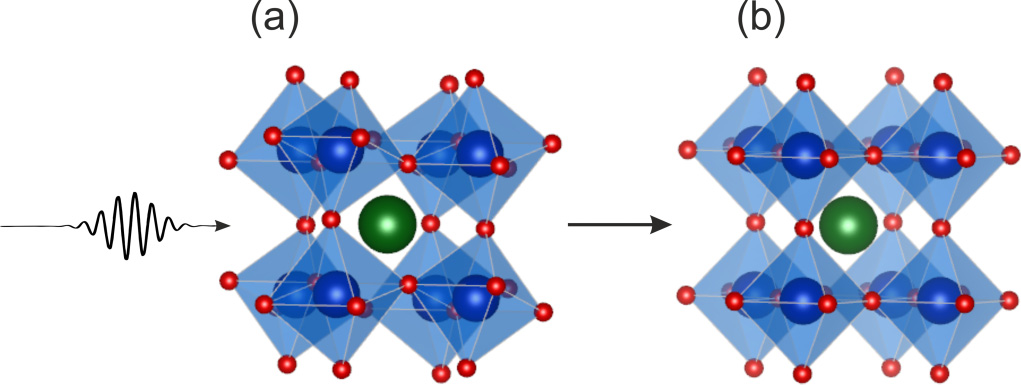

In [102]:
img

In [103]:
img.save('image1.png')

Другой способ 

In [104]:
base_image = pdf_file.extract_image(images[0][0])

In [105]:
with open('image.png', 'wb') as bytes_:
    bytes_.write(base_image['image'])

Сохраним все картинки в из статьи в папку с фотографиями

In [106]:
path_to_dir = os.path.abspath(os.path.join('./photo', 'paper-images'))

In [107]:
path_to_dir

'c:\\vs_projects\\Automation of work with text data and Excel tables using Python\\2. Read, write and manage files for different OS\\photo\\paper-images'

In [108]:
os.makedirs(path_to_dir)

In [109]:
page.get_label()

'2'

In [110]:
for page in pdf_file:
    images_on_page = page.get_images()
    for (num, image) in enumerate(images_on_page, start=1):
        base_image = pdf_file.extract_image(image[0])
        name = f"Image_page_{page.get_label()}_{num}.{base_image['ext']}"
        path_to_save = os.path.join(path_to_dir, name)
        with open(path_to_save, 'wb') as bytes_:
            bytes_.write(base_image['image'])

Ссылка на библиотеку с [документацией](https://pymupdf.readthedocs.io/en/latest/the-basics.html "pymupdf docs")

## Взаимодействие с облачным хранилищем Google Disk

Нашей задачей будет настроить связь между локальным компьютером и сервисом Google Drive для обмена файлами.

### Подготовка к проекту 

1. Создание проекта в Google Cloud Console
    1. Идем по ссылке на [Google Cloud Console](https://console.cloud.google.com/ "Console")
    2. Создаем новый проект
    3. Далее, нужно включить API Google Drive:
        * Перейдите в "API и службы" > "Библиотека"
        * Найдите "Google Drive API" и включите его
2. Настройка учетных данных 
    1. Перейдите в "API и службы" > "Учетные данные".
    2. Нажмите "Создать учетные данные" и выберите "OAuth 2.0 Client ID"
    3. Выберите тип приложения (например, "Desktop app") и создайте учетные данные
    4. Скачайте файл `credentials.json`
3. Установка необходимых библиотек
    ```python 
    pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
    ```
    



In [184]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [185]:
import io
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload, MediaIoBaseDownload

Первая авторизация

In [186]:
CREDENTIALS = '../client_secret.json'
SCOPES = ['https://www.googleapis.com/auth/drive']

In [187]:
flow = InstalledAppFlow.from_client_secrets_file(CREDENTIALS, SCOPES)

In [188]:
flow

In [189]:
creds = flow.run_local_server(port=0)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=763829165223-sbnj2n605rmak3835kv92k8oq3vg1vsv.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50493%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=0fwB3ykZhrRyZozFi5iqLRJic4UuF3&access_type=offline


Создадим объект для работы с диском

In [190]:
service = build('drive', 'v3', credentials=creds)

In [192]:
def create_file(filename, parents=None):
    file_metadata = {
        'name': filename,
        'mimeType': 'text/plain'
    }
    if parents:
        file_metadata['parents'] = [parents]
        
    file = service.files().create(body=file_metadata, fields='id').execute()
    
    return file

In [193]:
file_txt = create_file('test.txt')

In [194]:
file_txt

{'id': '1kulY1TkPALboX8PO2p2wnjoTJFcJOHtc'}

In [195]:
def create_folder(foldername):
    folder_metadata = {
        'name': foldername,
        'mimeType': 'application/vnd.google-apps.folder'
    }
    folder = service.files().create(body=folder_metadata, fields='id').execute()
    return folder 

In [196]:
folder = create_folder('new-folder')

In [199]:
new_file = create_file('inner.txt', parents=folder['id'])

In [202]:
res = service.files().list().execute()

In [205]:
res.keys()

dict_keys(['nextPageToken', 'kind', 'incompleteSearch', 'files'])

In [ ]:
res['files']

In [212]:
def list_files_in_folder(folder_id):
    res = service.files().list(
        q=f"'{folder_id}' in parents",
        pageSize=10,
        fields="nextPageToken, files(id, name)"
    ).execute()
    items = res.get('files', [])
    if not items:
        print('Пустая папка')
    else:
        print("Файлы в папке:")
        for item in items:
            print(item)
        return res

In [213]:
res = list_files_in_folder(folder['id'])

Файлы в папке:
{'id': '1fl1NK12WJF0Csr6ixKGP26mE8_a-jhsO', 'name': 'inner.txt'}


In [214]:
res

{'files': [{'id': '1fl1NK12WJF0Csr6ixKGP26mE8_a-jhsO', 'name': 'inner.txt'}]}

In [216]:
path = os.path.abspath('lecture.ipynb')

In [218]:
os.path.basename(path)

'lecture.ipynb'

In [229]:
def upload_file(service, file_path):
    file_metadata = {
        'name': os.path.basename(file_path),
    }
    media = MediaFileUpload(file_path, mimetype='application/octet-stream')
    file = service.files().create(body=file_metadata, media_body=media, fields='id').execute()
    print(f"Файл загружен с ID: {file.get('id')}")
    return file
    

In [230]:
upload_file(service, path)

Файл загружен с ID: 1DawhxLoUjMJCLL66gjxcR4MsSApaD9h4


{'id': '1DawhxLoUjMJCLL66gjxcR4MsSApaD9h4'}

In [249]:
def download_file(service, file_id, dest):
    request = service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print(f"Загрузка {int(status.progress()) * 100}")
    fh.seek(0)
    with open(dest, 'wb') as f:
        f.write(fh.read())
    print(f'Файл скачан: {dest}')

In [250]:
file_txt

{'id': '1kulY1TkPALboX8PO2p2wnjoTJFcJOHtc'}

In [254]:
path = os.path.join(os.getcwd(), 'downloaded_txt.txt')

In [255]:
path

'/Users/xela/Documents/Library/Working_Directory/ДПО-автоматизация-рутинных-процессов/lecture2/downloaded_txt.txt'

In [256]:
download_file(service, file_txt['id'], path)

Загрузка 0
Файл скачан: /Users/xela/Documents/Library/Working_Directory/ДПО-автоматизация-рутинных-процессов/lecture2/downloaded_txt.txt


In [257]:
def download_folder(service, folder_id, dest):
    if not os.path.exists(dest):
        os.makedirs(dest)
    
    query = f"'{folder_id}' in parents"
    results = service.files().list(q=query).execute()
    items = results.get('files', [])
    
    for item in items:
        file_id = item['id']
        file_name = item['name']
        dest_path = os.path.join(dest, file_name)
        
        if item['mimeType'] == 'application/vnd.google-apps.folder':
            download_folder(service, file_id, dest_path)
        else:
            download_file(service, file_id, dest_path)


In [258]:
folder

{'id': '1hEsoMRZWzrFUVdFlLDoicDB3KmwklYdq'}

In [262]:
path = os.path.join(os.getcwd(), 'new-dir-test')

In [263]:
path

'/Users/xela/Documents/Library/Working_Directory/ДПО-автоматизация-рутинных-процессов/lecture2/new-dir-test'

In [264]:
download_folder(service, folder['id'], path)

Загрузка 100
Файл скачан: /Users/xela/Documents/Library/Working_Directory/ДПО-автоматизация-рутинных-процессов/lecture2/new-dir-test/inner-dir/lecture.ipynb
Загрузка 0
Файл скачан: /Users/xela/Documents/Library/Working_Directory/ДПО-автоматизация-рутинных-процессов/lecture2/new-dir-test/inner-dir/test.txt
Загрузка 0
Файл скачан: /Users/xela/Documents/Library/Working_Directory/ДПО-автоматизация-рутинных-процессов/lecture2/new-dir-test/inner.txt
